# Logistic Regression (SUV data analysis)

### step 1: collecting data

In [105]:
# import lib
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv data
suv_data = pd.read_csv('C:\\Users\\sneha\\ML_Prob\\suv_data.csv')
suv_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [106]:
suv_data.shape # get data shape

(400, 5)

### step 2: data analysis

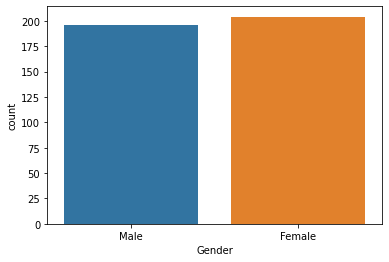

In [107]:
sns.countplot(x = 'Gender',data = suv_data)  # get countplot based on gender

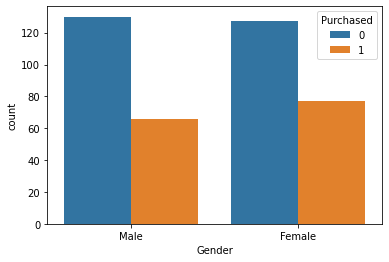

In [108]:
sns.countplot(x = 'Gender',hue = 'Purchased',data = suv_data) 

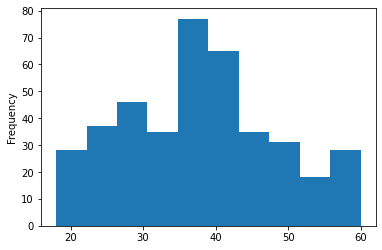

In [109]:
suv_data['Age'].plot.hist() # agewise histogram plot

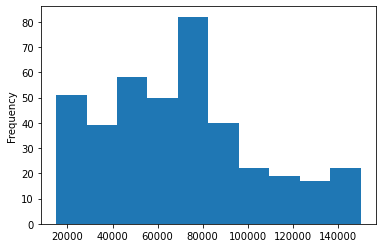

In [110]:
suv_data['EstimatedSalary'].plot.hist() # estimatedsalery wise histogram plot

In [111]:
suv_data.info() # get info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


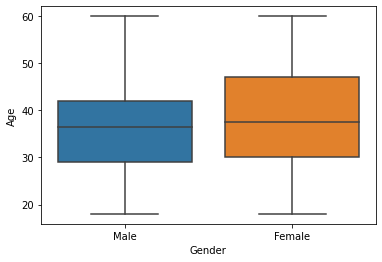

In [112]:
sns.boxplot(x= 'Gender',y='Age',data = suv_data) 

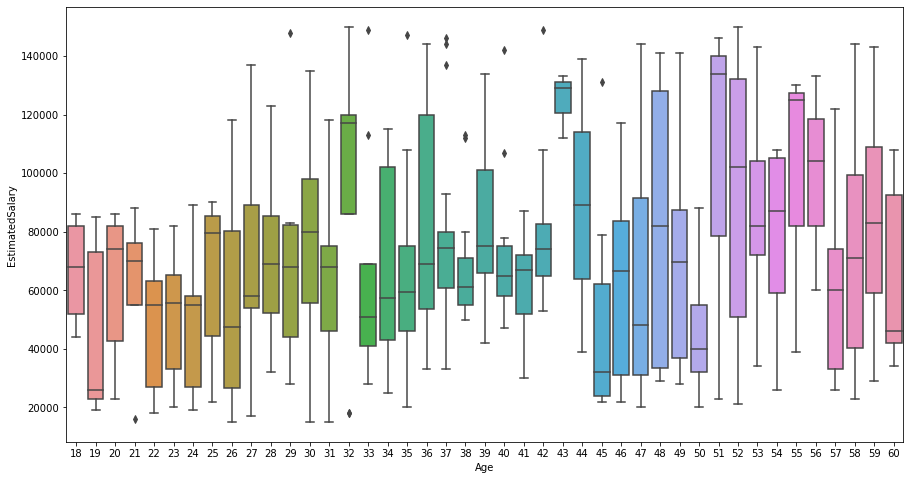

In [113]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'Age',y = 'EstimatedSalary',data = suv_data)

###  step 3: data wrangling

In [114]:
suv_data.isnull()  # check null values

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [115]:
suv_data.isnull().sum() # get coumnwise sum of null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

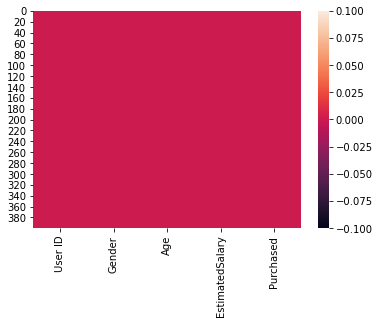

In [116]:
sns.heatmap(suv_data.isnull())  # draw heatmap to show null value column (no column having null val)

In [117]:
suv_data.dropna(inplace = True) # drop all null values

In [118]:
suv_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [119]:
gen = pd.get_dummies(suv_data['Gender'],drop_first = True) # convert string into categorical (for gender column)
gen

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [120]:
suv_data = pd.concat([suv_data,gen],axis = 1) # concatenate the converted column into actual data
suv_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [121]:
suv_data.drop(['User ID','Gender'],axis = 1,inplace = True) # drop unnecessary column from data
suv_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


### step 4: train & test model

In [122]:
X = suv_data.drop(['Purchased','Male'],axis = 1)  # get independent variable
Y = suv_data['Purchased'] # get dependent variable


In [104]:
# perform train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [123]:
# scale the data (independent) as estimated salery is very large in range as compare to age

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [124]:
# build the model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()


In [125]:
logmodel.fit(x_train,y_train) # model fitting

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred = logmodel.predict(x_test) # prediction on test data

### step 5: performance evaluation

In [127]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [128]:
confusion_matrix(y_test,y_pred)

array([[63,  5],
       [ 8, 24]], dtype=int64)

In [129]:
accuracy_score(y_test,y_pred) * 100

87.0

In [130]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.93      0.91        68\n           1       0.83      0.75      0.79        32\n\n    accuracy                           0.87       100\n   macro avg       0.86      0.84      0.85       100\nweighted avg       0.87      0.87      0.87       100\n'